# **Libraries and Dataset**

In [1]:
!pip install datasets

In [2]:
import re
import datasets
from datasets import load_dataset_builder, load_dataset

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

In [3]:
simbolo = dataset = load_dataset("Simbolo-Servicio/wiki-burmese-sentences")
sim_train = simbolo['train']['text']

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


# **Sayar Ye Kyaw Thu's Sylbreak**

In [4]:
def create_break_pattern():
    """Creates and returns the regular expression pattern for Myanmar syllable breaking."""
    my_consonant = r"က-အ"
    en_char = r"a-zA-Z0-9"
    other_char = r"ဣဤဥဦဧဩဪဿ၌၍၏၀-၉၊။!-/:-@[-`{-~\s"
    subscript_symbol = r'္'
    a_that = r'်'

    # Regular expression pattern for Myanmar syllable breaking
    return re.compile(
        r"((?<!" + subscript_symbol + r")[" + my_consonant + r"]"
        r"(?!["
        + a_that + subscript_symbol + r"])"
        + r"|[" + en_char + other_char + r"])"
    )

def break_syllables(line, break_pattern, separator):
    """Applies syllable breaking rules to a line."""
    line = re.sub(r'\s+', ' ', line.strip())
    segmented_line = break_pattern.sub(separator + r"\1", line)

    # Remove the leading delimiter if it exists
    if segmented_line.startswith(separator):
        segmented_line = segmented_line[len(separator):]

    # Replace delimiter+space+delimiter with a single space
    double_delimiter = separator + " " + separator
    segmented_line = segmented_line.replace(double_delimiter, " ")

    return segmented_line

In [5]:
EOS = []

break_pattern = create_break_pattern()

for sentence in sim_train:
  EOS.append(break_syllables(sentence, break_pattern, " ").split()[-1])

EOS_unique = list(set(EOS))

EOS_frequencies = {i: EOS.count(i) for i in EOS_unique}
# EOS_frequencies

# **KO Swan Htet Aung's ReSegment**

In [6]:
def segment(text):
    text = re.sub(r'(?:(?<!္)([က-ဪဿ၊-၏]|[၀-၉]+|[^က-၏]+)(?![ှျ]?[့္်]))', r'𝕊\1', text).strip('𝕊').split('𝕊')
    return text

In [7]:
EOS_2 = []

for sentence in sim_train:
  EOS_2.append(segment(sentence)[-1])

EOS_unique1 = list(set(EOS_2))

EOS_frequencies1 = {i: EOS_2.count(i) for i in EOS_unique1}
# EOS_frequencies1

In [8]:
EOS_frequencies_over_100 = {word: freq for word, freq in EOS_frequencies1.items() if freq > 100}

In [9]:
EOS_frequencies_over_100

{'ခဲ့': 141,
 'ချေ': 1000,
 'ပေ': 1170,
 'သည်': 81575,
 'ဉာဏ်': 126,
 'တည်း': 412,
 'ရှိ': 112,
 'မည်': 1015,
 'ဘူး': 111,
 'သုတ်': 415,
 'ရက်': 210,
 'တယ်': 1481,
 'ချောင်း': 106,
 'ပါ': 723,
 'ပြီ': 252,
 'ရ': 114,
 ')': 506,
 '၏': 9110,
 'ခြင်း': 430,
 '၂': 111,
 'ကြီး': 115}

In [10]:
words = list(EOS_frequencies_over_100.keys())
frequencies = list(EOS_frequencies_over_100.values())

In [11]:
fontPath = '/content/mmrtext.ttf'
prop = fm.FontProperties(fname=fontPath, size=12)

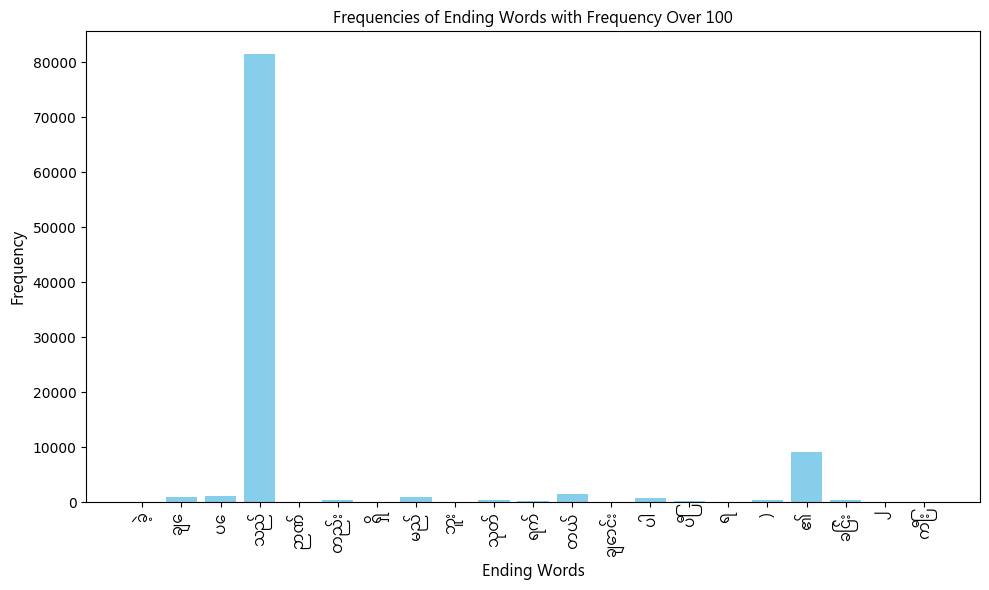

<Figure size 640x480 with 0 Axes>

In [12]:
plt.figure(figsize=(10, 6))
plt.bar(words, frequencies, color='skyblue')
plt.xlabel('Ending Words', fontproperties=prop)
plt.ylabel('Frequency', fontproperties=prop)
plt.title('Frequencies of Ending Words with Frequency Over 100', fontproperties=prop)
plt.xticks(rotation=90, fontproperties=prop)
plt.tight_layout()
plt.show()

plt.savefig('Frequencies of Ending Words with Frequency Over 100.png')